In [23]:
from sklearn import svm
import numpy as np, pandas as pd, os
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [12]:
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])
feature_names.append('class')
train_data = pd.read_csv("poker-hand-training-true.data",names=feature_names)
test_data = pd.read_csv("poker-hand-testing.data",names=feature_names)
np.random.seed(666)    
class myConfigs:
    features = 0
    classes = 0
config = myConfigs()

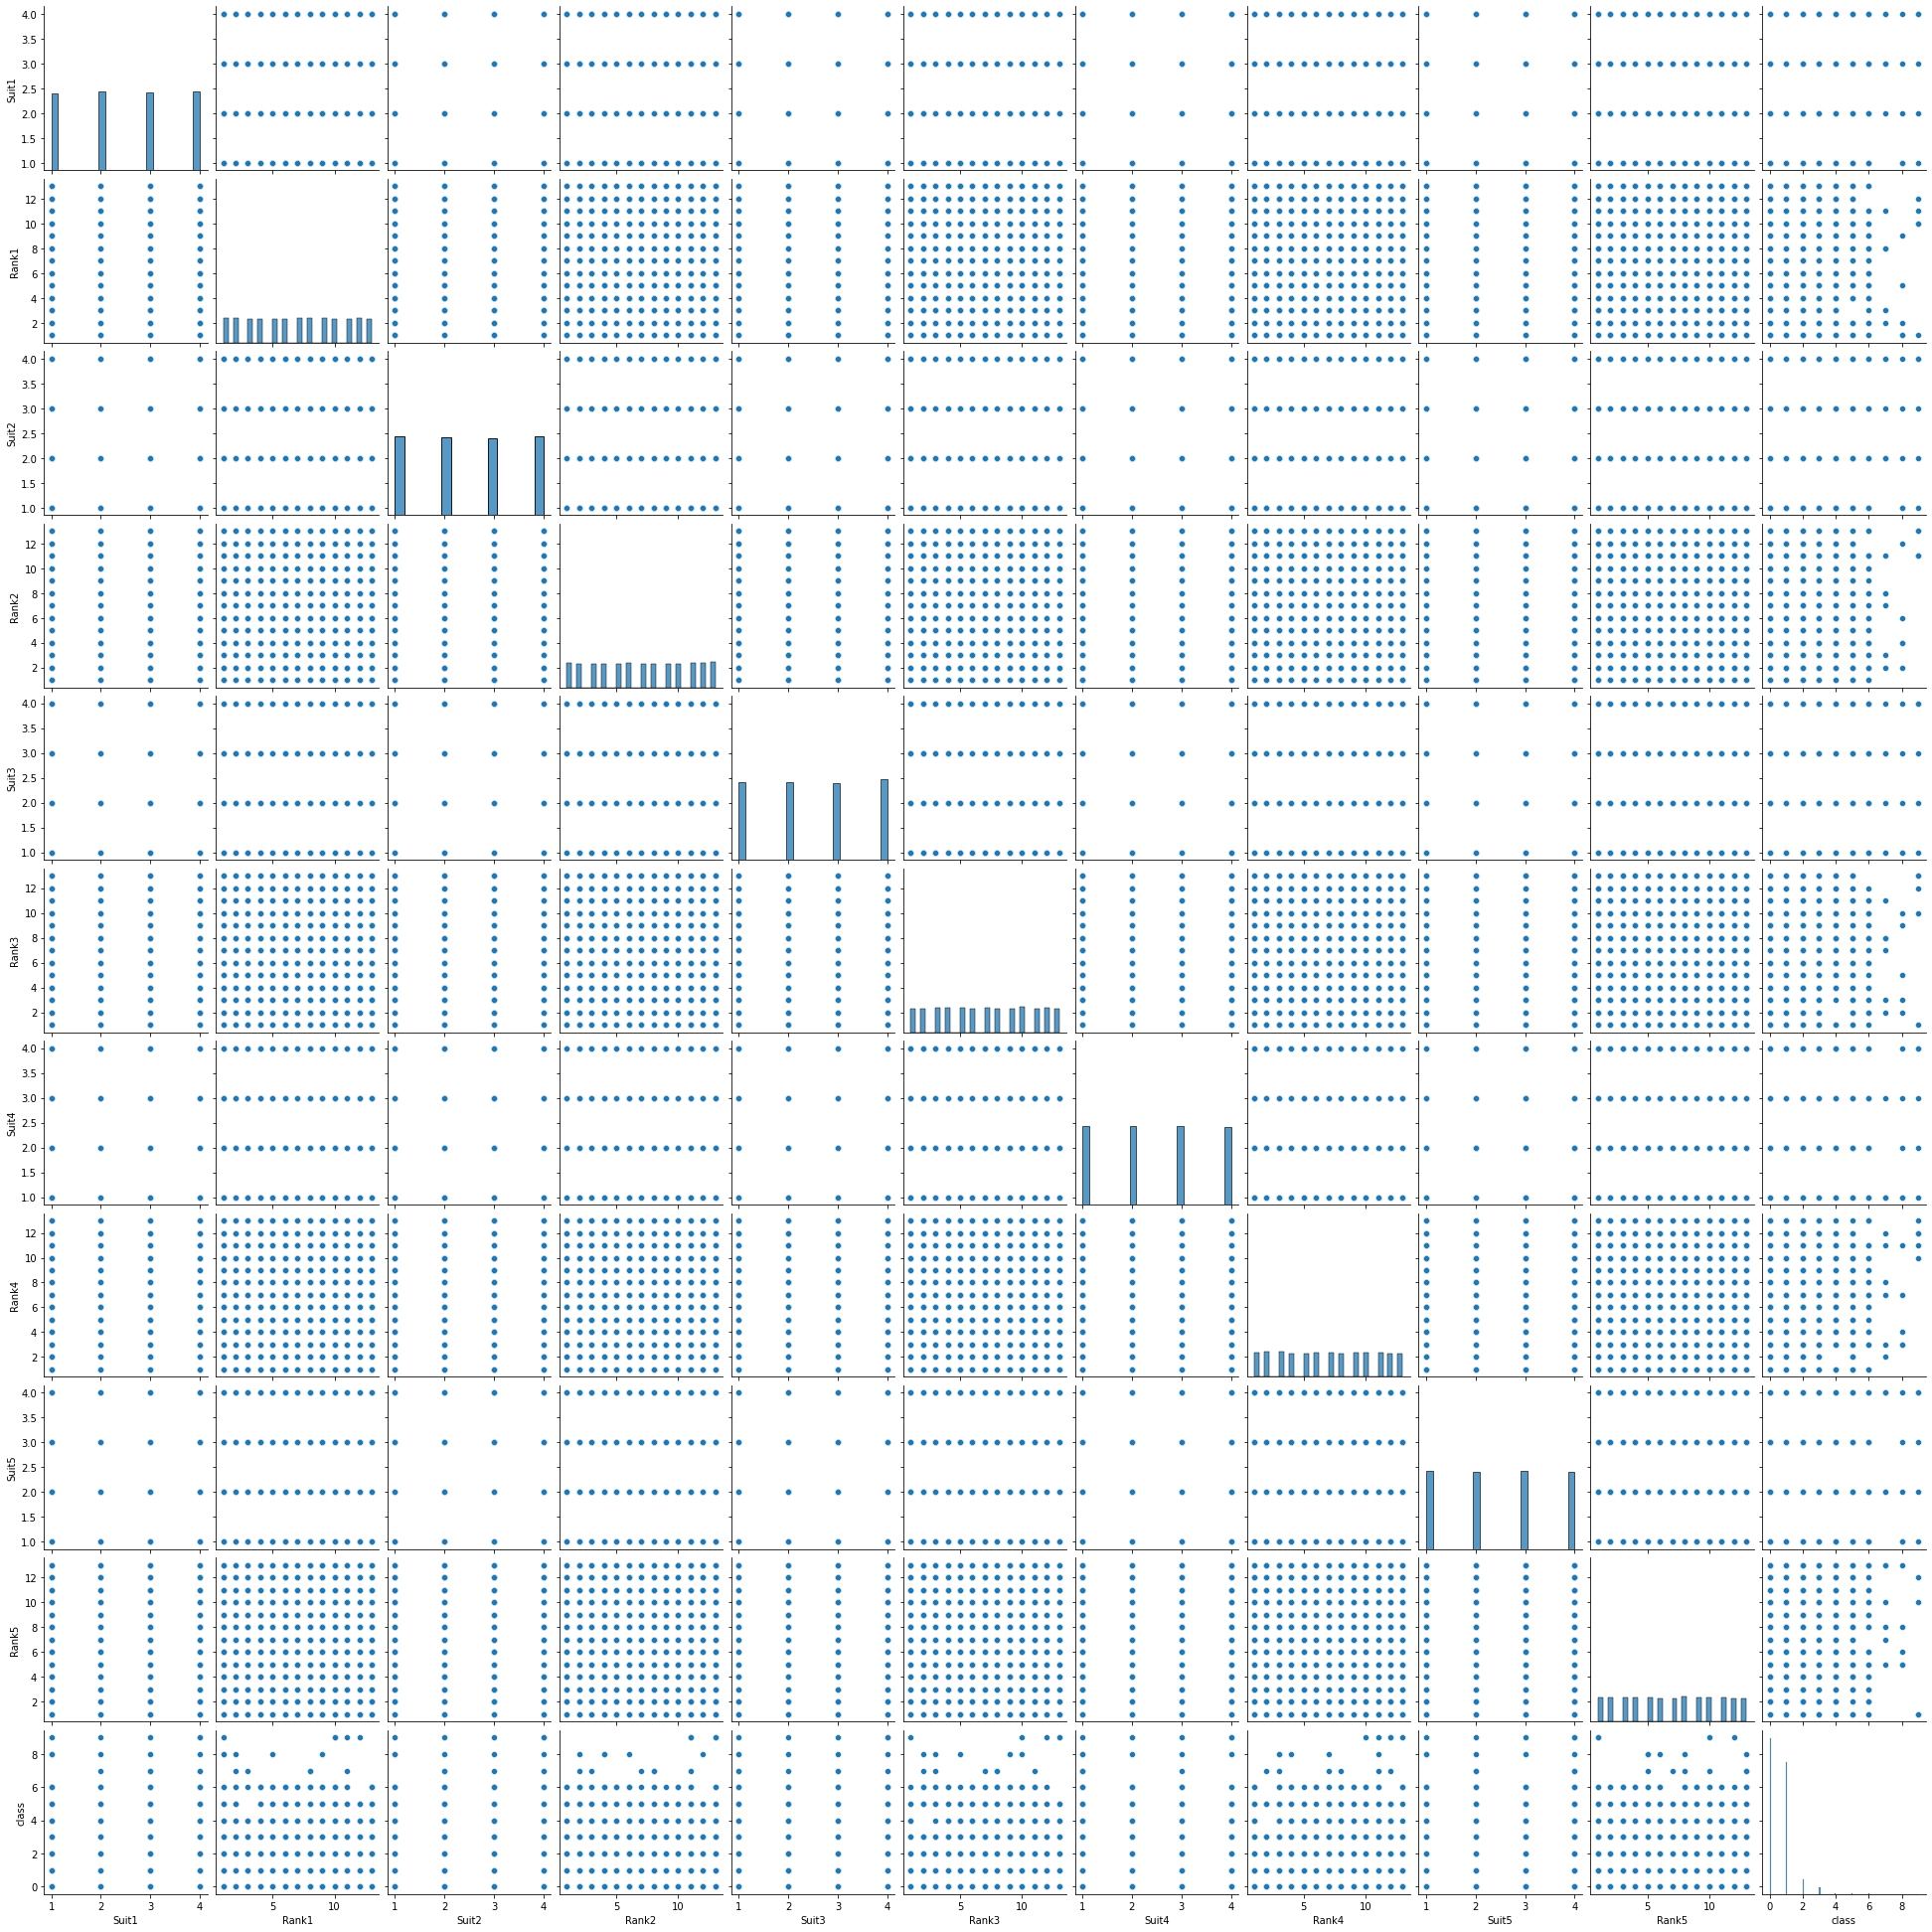

In [24]:
sns.pairplot(train_data)

In [13]:
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

In [14]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [19]:
Y_train = np.array(train_data['class'])
X_train = np.array(train_data.drop('class', 1))

Y_test = np.array(test_data['class'])
X_test = np.array(test_data.drop('class', 1))

if __name__ == '__main__':
    tab = PrettyTable(['Config', 'Value'])
    configs = vars(config)

    for key in configs:
        tab.add_row([key, configs[key]])
    print(tab)

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)
print(pred)
print("The accuracy for desicion tree is: ",accuracy_score(Y_test,pred))

[0 0 1 ... 1 1 0]
The accuracy for desicion tree is:  0.479303
